In [6]:
import json
import pandas as pd
from src.comparator import compare_metadata, Comparator, print_diff, print_correctly_extracted
import src.datasets as load
from src.kuba_information_extractor import KubaInformationExtractor
import pprint

DATA_PATH = 'data/'
data_sets = load.load(DATA_PATH)

import numpy as np  
import re  
from sklearn.datasets import load_files  
import pickle  

from src.morf_utils import MorfWrapper
from src.compare_utils import deogonkify
import morfeusz2

translation = {"female": 2, "male": 1, "any": 0}

In [7]:
X = []
y = []

for d in data_sets:
    content = d["content"]
    category = d["meta"]["preferredGender"]
    if category is None:
        category = 'any'
    X.append(content)
    y.append(translation[category])
    
y = np.array(y)

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 650,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Prusa',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 11,
 'rent': 700,
 'bills': None,
 'deposit': 700,
 'internetSpeed': None,
 'district': 'Złotniki',
 'street': 'Kosmonautów',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 12,
 'rent': 700,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Żmigrodzka',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': 50,
 'roomMeterage': 16,
 'rent': 900,
 'bills': 250,
 'deposit': 1100,
 'internetSpeed': None,
 'district': 'Krakowskie Tarasy',
 'street': 'Krakowska',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 17,
 'rent': 800,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Nowe Jagodno',
 'street': 'Buforowa',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 500,
 'bills': 150,
 'deposit': None,
 'internetSpeed': 120,
 'district': None,
 'street': None,
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 900,
 'bills': 0,
 'deposit': 900,
 'internetSpeed': None,
 'district': None,
 'street': 'Szczęśliwa',
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 710,
 'bills': 60,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Różanka',
 'street': 'Bałtycka/Broniewskiego',
 'roomsCount': 4,
 'flatmatesCount': 3,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 1050,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Grabiszyńska',
 'roomsCount': 2,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'female'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 600,
 'bills': None,
 'deposit': 600,
 'internetSpeed': None,
 'district': 'Różanka',
 'street': None,
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'professional',
 'preferredGender': 'male'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 1100,
 'bills': 200,
 'deposit': 1000,
 'internetSpeed': None,
 'district': None,
 'street': 'Młodnickiego',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 650,
 'bills': None,
 'deposit': 650,
 'internetSpeed': None,
 'district': None,
 'street': 'Hallera',
 'roomsCount': None,
 'flatmatesCount': 4,
 'flatmatesGenders': ['female', 'female', 'female', 'female'],
 'flatmatesOccupation': ['proffesional',
  'proffesional',
  'proffesional',
  'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 1100,
 'bills': 0,
 'deposit': 1100,
 'internetSpeed': None,
 'district': None,
 'street': 'Jesionowa',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 9.5,
 'rent': 900,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Prądzyńskiego',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'male'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 52,
 'roomMeterage': 6,
 'rent': None,
 'bills': None,
 'deposit': 500,
 'internetSpeed': None,
 'district': None,
 'street': 'Krucza',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 1050,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'male'],
 'flatmatesOccupation': ['student/proffesional', 'student/proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 850,
 'bills': 0,
 'deposit': 850,
 'internetSpeed': None,
 'district': None,
 'street': 'Szpitalna',
 'roomsCount': 6,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 450,
 'bills': 90,
 'deposit': 650,
 'internetSpeed': 100,
 'district': 'Muchobór Wielki',
 'street': 'Trawowa',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['female', 'male'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 70,
 'roomMeterage': 10,
 'rent': 850,
 'bills': 0,
 'deposit': 850,
 'internetSpeed': 100,
 'district': None,
 'street': 'Prądzyńskiego',
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 800,
 'bills': 90,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Oporów',
 'street': 'Solskiego',
 'roomsCount': 2,
 'flatmatesCount': 1,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 64,
 'roomMeterage': None,
 'rent': 650,
 'bills': 160,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Muchobór Wielki',
 'street': 'Gagarina',
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 25,
 'rent': 1200,
 'bills': 0,
 'deposit': 1200,
 'internetSpeed': None,
 'district': None,
 'street': 'Tomaszowska',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 800,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Dubois',
 'roomsCount': 2,
 'flatmatesCount': 1,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 22,
 'rent': 500,
 'bills': 150,
 'deposit': 650,
 'internetSpeed': None,
 'district': None,
 'street': 'Macedońska',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 675,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Burzowa',
 'roomsCount': 3,
 'flatmatesCount': 3,
 'flatmatesGenders': ['female', 'female', 'female'],
 'flatmatesOccupation': None,
 'preferredOccupation': 'student',
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 15,
 'rent': None,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Klimasa',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': 58,
 'roomMeterage': None,
 'rent': 500,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Jaracza',
 'roomsCount': 3,
 'flatmatesCount': 3,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 550,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Maślice',
 'street': 'Kozia',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 500,
 'bills': 100,
 'deposit': 600,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 68,
 'roomMeterage': 12,
 'rent': 700,
 'bills': 100,
 'deposit': 800,
 'internetSpeed': None,
 'district': 'Krzyki',
 'street': 'Burzowa',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'male'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 10,
 'rent': 780,
 'bills': 0,
 'deposit': 300,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 54,
 'roomMeterage': 13,
 'rent': 710,
 'bills': 210,
 'deposit': 950,
 'internetSpeed': None,
 'district': 'Muchobór Mały',
 'street': 'Szkocka',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 63.3,
 'roomMeterage': None,
 'rent': 730,
 'bills': 160,
 'deposit': 900,
 'internetSpeed': 300,
 'district': 'Nowy Dwór',
 'street': 'Budziszyńska',
 'roomsCount': 5,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 62,
 'roomMeterage': 11,
 'rent': 570,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': None,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': 100,
 'deposit': 750,
 'internetSpeed': None,
 'district': None,
 'street': 'Pilczycka',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 490,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Horbaczewskiego',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 150,
 'deposit': 1000,
 'internetSpeed': None,
 'district': None,
 'street': 'Gajowicka',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': 64,
 'roomMeterage': None,
 'rent': None,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Horbaczewskiego',
 'roomsCount': 3,
 'flatmatesCount': 3,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 15,
 'rent': 1200,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Śródmieście',
 'street': 'Miarki',
 'roomsCount': 2,
 'flatmatesCount': 1,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 350,
 'bills': 100,
 'deposit': 500,
 'internetSpeed': None,
 'district': None,
 'street': 'Nowodworska',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 785,
 'bills': 0,
 'deposit': 785,
 'internetSpeed': None,
 'district': None,
 'street': 'Tyrmanda',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 1100,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Wielka',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 550,
 'bills': 0,
 'deposit': 550,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': ['female', 'female', 'female', 'female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 18,
 'rent': 400,
 'bills': 150,
 'deposit': None,
 'internetSpeed': 100,
 'district': None,
 'street': 'Radosna',
 'roomsCount': 2,
 'flatmatesCount': 2,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'student',
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 13,
 'rent': None,
 'bills': None,
 'deposit': 800,
 'internetSpeed': None,
 'district': None,
 'street': 'Zielińskiego',
 'roomsCount': 2,
 'flatmatesCount': 1,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': 150,
 'deposit': 950,
 'internetSpeed': 650,
 'district': None,
 'street': 'Krynicka',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'professional',
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': 40,
 'roomMeterage': None,
 'rent': 530,
 'bills': 0,
 'deposit': 500,
 'internetSpeed': None,
 'district': None,
 'street': 'Opolska',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 30,
 'rent': 800,
 'bills': 400,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Strachocin',
 'street': 'Niedziałkowskiego',
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 850,
 'bills': 150,
 'deposit': 1000,
 'internetSpeed': None,
 'district': None,
 'street': 'Wyszyńskiego',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 15,
 'rent': 1050,
 'bills': 0,
 'deposit': 1000,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': None,
 'flatmatesCount': 1,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 860,
 'bills': 0,
 'deposit': 700,
 'internetSpeed': None,
 'district': 'Krzyki',
 'street': 'Skibowa',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 8,
 'rent': 800,
 'bills': 140,
 'deposit': 940,
 'internetSpeed': None,
 'district': None,
 'street': 'Wejherowska',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 900,
 'bills': 150,
 'deposit': 1050,
 'internetSpeed': None,
 'district': None,
 'street': 'Legnicka',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'male'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 11,
 'rent': 850,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Piłsudskiego',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Grabiszyńska',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 500,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Papiernicza',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': 70,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': ['student', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 1100,
 'bills': 0,
 'deposit': 1100,
 'internetSpeed': None,
 'district': None,
 'street': 'Jesionowa',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 500,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Krucza',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 51,
 'roomMeterage': 12.5,
 'rent': 1000,
 'bills': 200,
 'deposit': 1200,
 'internetSpeed': None,
 'district': 'Brochów',
 'street': 'Mościckiego',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 850,
 'bills': 0,
 'deposit': None,
 'internetSpeed': 700,
 'district': 'Popowice',
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 800,
 'bills': 100,
 'deposit': 100,
 'internetSpeed': None,
 'district': None,
 'street': 'Gajowicka',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 72,
 'roomMeterage': 15,
 'rent': 600,
 'bills': 250,
 'deposit': 850,
 'internetSpeed': None,
 'district': None,
 'street': 'Hermanowska',
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 18,
 'rent': None,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Krzyki',
 'street': 'Róży Wiatrów',
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 550,
 'bills': 0,
 'deposit': 500,
 'internetSpeed': None,
 'district': None,
 'street': 'Powstańców Śląskich',
 'roomsCount': 2,
 'flatmatesCount': 3,
 'flatmatesGenders': ['female', 'female', 'female'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 480,
 'bills': None,
 'deposit': 480,
 'internetSpeed': None,
 'district': None,
 'street': 'Grabiszyńska',
 'roomsCount': None,
 'flatmatesCount': 1,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': 'student',
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Kuźnicza',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 14,
 'rent': 600,
 'bills': 150,
 'deposit': 750,
 'internetSpeed': None,
 'district': 'Krzyki',
 'street': 'Stysia',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 650,
 'bills': 120,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Sępa-Szarzyńskiego',
 'roomsCount': 3,
 'flatmatesCount': 3,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 200,
 'deposit': 750,
 'internetSpeed': 100,
 'district': None,
 'street': 'Lwowska',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': 60,
 'roomMeterage': 12,
 'rent': 600,
 'bills': 150,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Plac Grunwaldzki',
 'street': 'Piastowska',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 12,
 'rent': 600,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Fabryczna',
 'street': 'Balonowa',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 1100,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Traugutta',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 650,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Kuźniki',
 'street': 'Dźwirzyńska',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 800,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Gaj',
 'street': 'Himalajska',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'professional',
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 56,
 'roomMeterage': 12,
 'rent': 1200,
 'bills': None,
 'deposit': 1200,
 'internetSpeed': None,
 'district': 'Victoria',
 'street': 'Tęczowa',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 12,
 'rent': 820,
 'bills': 140,
 'deposit': None,
 'internetSpeed': 150,
 'district': 'Muchobór Mały',
 'street': None,
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 500,
 'bills': 70,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Grodzka',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': ['student', 'student'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 11,
 'rent': 850,
 'bills': 320,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Gliniana',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 450,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Drzewieckiego',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 900,
 'bills': 100,
 'deposit': 900,
 'internetSpeed': 50,
 'district': None,
 'street': 'Śliczna',
 'roomsCount': None,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'male'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 700,
 'bills': None,
 'deposit': 400,
 'internetSpeed': None,
 'district': 'Jagodno',
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': None,
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 14,
 'rent': None,
 'bills': 0,
 'deposit': None,
 'internetSpeed': 100,
 'district': None,
 'street': 'Sępia',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': ['student', 'student'],
 'preferredOccupation': 'student',
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 1100,
 'bills': 15,
 'deposit': 1115,
 'internetSpeed': None,
 'district': None,
 'street': 'Powstańców Śląskich',
 'roomsCount': None,
 'flatmatesCount': 2,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 950,
 'bills': 130,
 'deposit': None,
 'internetSpeed': 300,
 'district': 'Krzyki',
 'street': 'Jastrzębia',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 500,
 'bills': 150,
 'deposit': 350,
 'internetSpeed': None,
 'district': 'Karłowice',
 'street': 'Czajkowskiego',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 500,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Psie Pole',
 'street': 'Milicka',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 24,
 'rent': 600,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Hauke Bosaka',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 500,
 'bills': 150,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Minkowskiego',
 'roomsCount': 3,
 'flatmatesCount': 3,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': ['studnet/proffesional',
  'studnet/proffesional',
  'studnet/proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 800,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Zaporowska',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 44,
 'roomMeterage': 12,
 'rent': 800,
 'bills': 150,
 'deposit': 950,
 'internetSpeed': None,
 'district': 'Jagodno',
 'street': 'Ekspresowa',
 'roomsCount': 2,
 'flatmatesCount': 1,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 550,
 'bills': 200,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Wieniawskiego',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 700,
 'bills': 0,
 'deposit': 0,
 'internetSpeed': None,
 'district': 'Karłowice',
 'street': 'Filomatów',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 6,
 'rent': 650,
 'bills': 125,
 'deposit': 700,
 'internetSpeed': 300,
 'district': 'Ołbin',
 'street': 'Barlickiego',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'student',
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 670,
 'bills': 70,
 'deposit': 500,
 'internetSpeed': None,
 'district': None,
 'street': 'Piękna',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'professional',
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 12,
 'rent': 800,
 'bills': 0,
 'deposit': 800,
 'internetSpeed': 10,
 'district': None,
 'street': 'Agrestowa',
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'professional',
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 1200,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Wielka',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': 0,
 'deposit': 500,
 'internetSpeed': None,
 'district': 'Kuźniki',
 'street': 'Sarbinowska',
 'roomsCount': 2,
 'flatmatesCount': 1,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 800,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Zaporowska',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 10,
 'rent': 750,
 'bills': 200,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Krynicka',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 13,
 'rent': 700,
 'bills': 50,
 'deposit': 800,
 'internetSpeed': None,
 'district': None,
 'street': 'Zielińskiego',
 'roomsCount': 2,
 'flatmatesCount': 1,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 650,
 'bills': 220,
 'deposit': 870,
 'internetSpeed': None,
 'district': None,
 'street': 'Zaporoska',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 820,
 'bills': 60,
 'deposit': 850,
 'internetSpeed': None,
 'district': None,
 'street': 'Tyrmandra',
 'roomsCount': 3,
 'flatmatesCount': 3,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Zielińskiego',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 700,
 'bills': 200,
 'deposit': 900,
 'internetSpeed': None,
 'district': 'Gądów Mały',
 'street': 'Bajana',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 700,
 'bills': 50,
 'deposit': 750,
 'internetSpeed': None,
 'district': 'Fabryczna',
 'street': 'Wojrowicka',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 11,
 'rent': 900,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Pereca',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': ['student', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 700,
 'bills': 170,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Gaj',
 'street': 'Krynicka',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Nowy Dwór',
 'street': 'Rogowska',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 1000,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': None,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'female'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 800,
 'bills': 0,
 'deposit': 800,
 'internetSpeed': None,
 'district': None,
 'street': 'Inowrocławska',
 'roomsCount': None,
 'flatmatesCount': 2,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': 'professional',
 'preferredGender': 'female'}

{'subject': 'roomShare',
 'flatMeterage': 65,
 'roomMeterage': 20,
 'rent': 1300,
 'bills': 0,
 'deposit': 1300,
 'internetSpeed': 300,
 'district': None,
 'street': 'Drzewieckiego',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Na Ostatnim Groszu',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 1200,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Nadodrze',
 'street': None,
 'roomsCount': 2,
 'flatmatesCount': 2,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 100,
 'deposit': 1000,
 'internetSpeed': None,
 'district': None,
 'street': 'Piastowska',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 14,
 'rent': 950,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Gajowice',
 'street': 'Manganowa',
 'roomsCount': 2,
 'flatmatesCount': 1,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': 'proffesional',
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Sępolno',
 'street': 'Mislawskiego',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 700,
 'bills': 170,
 'deposit': None,
 'internetSpeed': 50,
 'district': None,
 'street': 'Lubuska',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 700,
 'bills': 50,
 'deposit': 700,
 'internetSpeed': None,
 'district': None,
 'street': 'Wieczysta',
 'roomsCount': 3,
 'flatmatesCount': 3,
 'flatmatesGenders': ['female', 'female', 'male'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 75,
 'roomMeterage': 11,
 'rent': 900,
 'bills': 200,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Nyska',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 55,
 'deposit': 750,
 'internetSpeed': None,
 'district': None,
 'street': 'Spiżowa',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': 'professional',
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': 90,
 'roomMeterage': None,
 'rent': 675,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': 5,
 'flatmatesGenders': ['male', 'female', 'female', 'female', 'female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 100,
 'deposit': 800,
 'internetSpeed': None,
 'district': 'Śródmieście',
 'street': 'Wyszyńskiego',
 'roomsCount': 4,
 'flatmatesCount': 3,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 51,
 'roomMeterage': None,
 'rent': 850,
 'bills': 0,
 'deposit': 850,
 'internetSpeed': None,
 'district': None,
 'street': 'Mościckiego',
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': '20',
 'deposit': None,
 'internetSpeed': None,
 'district': 'Sun House',
 'street': 'Kleczkowska',
 'roomsCount': None,
 'flatmatesCount': 1,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 800,
 'bills': 170,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Wielka',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'professional',
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 72,
 'roomMeterage': 15,
 'rent': 600,
 'bills': 250,
 'deposit': 600,
 'internetSpeed': None,
 'district': None,
 'street': 'Hermanowska',
 'roomsCount': 4,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 15,
 'rent': None,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': 4,
 'flatmatesCount': 3,
 'flatmatesGenders': ['male', 'male', 'male'],
 'flatmatesOccupation': ['student', 'student', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 20,
 'rent': 950,
 'bills': 80,
 'deposit': 950,
 'internetSpeed': None,
 'district': None,
 'street': 'Krucza',
 'roomsCount': 3,
 'flatmatesCount': 2,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': ['proffesional', 'proffesional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 650,
 'bills': 70,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Gaj',
 'street': 'Srebrnogórska',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': 'professional',
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 12,
 'rent': 650,
 'bills': 100,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Kuźniki',
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 30,
 'rent': 900,
 'bills': 155,
 'deposit': 900,
 'internetSpeed': None,
 'district': None,
 'street': 'Kraszewskiego',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 700,
 'bills': 150,
 'deposit': 850,
 'internetSpeed': None,
 'district': None,
 'street': 'Siemieńskiego',
 'roomsCount': 4,
 'flatmatesCount': 3,
 'flatmatesGenders': ['female', 'female', 'female'],
 'flatmatesOccupation': None,
 'preferredOccupation': 'student',
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 900,
 'bills': 0,
 'deposit': 900,
 'internetSpeed': None,
 'district': None,
 'street': 'Kromera',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 75,
 'roomMeterage': 14,
 'rent': 1000,
 'bills': None,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Oporów',
 'street': 'Balzaka',
 'roomsCount': 3,
 'flatmatesCount': 1,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': ['proffesional'],
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': 'Muchobór Mały',
 'street': None,
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 750,
 'bills': 150,
 'deposit': 900,
 'internetSpeed': None,
 'district': 'Krzyki',
 'street': 'Armii Krajowej',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 10,
 'rent': 800,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Nowodworska',
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': 46,
 'roomMeterage': 12,
 'rent': 1100,
 'bills': 100,
 'deposit': 1100,
 'internetSpeed': 50,
 'district': None,
 'street': None,
 'roomsCount': 2,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 400,
 'bills': 0,
 'deposit': None,
 'internetSpeed': None,
 'district': None,
 'street': 'Dmowskiego',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': ['female'],
 'flatmatesOccupation': ['student'],
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': 63,
 'roomMeterage': 12,
 'rent': 600,
 'bills': 150,
 'deposit': 600,
 'internetSpeed': None,
 'district': 'Kozanów',
 'street': 'Gołężycka',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': ['female', 'female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': 'female'}

{'subject': 'room',
 'flatMeterage': 88,
 'roomMeterage': 12,
 'rent': 820,
 'bills': 140,
 'internetSpeed': 150,
 'district': 'Muchobór Mały',
 'street': None,
 'roomsCount': None,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 850,
 'bills': 100,
 'deposit': 850,
 'internetSpeed': 50,
 'district': 'Krzyki',
 'street': 'Śliczna',
 'roomsCount': None,
 'flatmatesCount': 2,
 'flatmatesGenders': ['male', 'male'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 1000,
 'bills': 0,
 'deposit': 0,
 'internetSpeed': None,
 'district': None,
 'street': None,
 'roomsCount': None,
 'flatmatesCount': 1,
 'flatmatesGenders': ['male'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'roomShare',
 'flatMeterage': None,
 'roomMeterage': 18,
 'rent': 550,
 'bills': 200,
 'deposit': 700,
 'internetSpeed': 40,
 'district': None,
 'street': 'Grunwaldzka',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': 850,
 'bills': 0,
 'deposit': 800,
 'internetSpeed': None,
 'district': None,
 'street': 'Wąska',
 'roomsCount': 3,
 'flatmatesCount': None,
 'flatmatesGenders': None,
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': 10,
 'rent': 900,
 'bills': 80,
 'deposit': 900,
 'internetSpeed': 60,
 'district': 'Plac Grunwaldzki',
 'street': 'Sienkiewicza',
 'roomsCount': 3,
 'flatmatesCount': 3,
 'flatmatesGenders': None,
 'flatmatesOccupation': ['professional'],
 'preferredOccupation': None,
 'preferredGender': None}

{'subject': 'room',
 'flatMeterage': None,
 'roomMeterage': None,
 'rent': None,
 'bills': None,
 'deposit': None,
 'internetSpeed': 250,
 'district': None,
 'street': 'Skwierzyńska',
 'roomsCount': 4,
 'flatmatesCount': 6,
 'flatmatesGenders': ['male', 'male', 'male', 'female', 'female', 'female'],
 'flatmatesOccupation': None,
 'preferredOccupation': None,
 'preferredGender': None}

In [8]:
documents = []

for sen in range(0, len(X)):  
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    documents.append(document)

In [9]:

stopwords = load.load_stopwords();

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=500, min_df=1, ngram_range=(1, 2), lowercase=True)  
tfidf = tfidfconverter.fit(documents)

X = tfidf.transform(documents).toarray()  

In [57]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)  

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100) 
# scores = cross_val_score(classifier, X, y, cv=4)
classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test) 

array([0.76923077, 0.89189189, 0.75675676, 0.72972973])

0.786902286902287

[[28  3]
 [ 5  2]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88        31
           2       0.40      0.29      0.33         7

   micro avg       0.79      0.79      0.79        38
   macro avg       0.62      0.59      0.60        38
weighted avg       0.77      0.79      0.78        38

0.7894736842105263


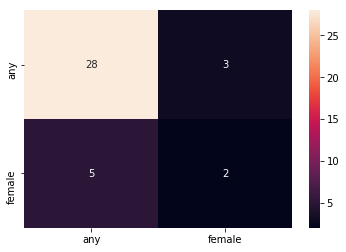

In [59]:
display (scores)
display (scores.mean())
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

conf_matrix_df = pd.DataFrame(confusion_matrix(y_test,y_pred), \
                                index= [key for key in ("any", "female")], \
                                columns=[key for key in ("any", "female")])
sns.heatmap(conf_matrix_df, annot=True)
plt.show()

In [ ]:
with open('classifier_occupation.pickle', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)

In [ ]:
pickle.dump(tfidf, open("tfidf_occupation.pickle", "wb"))

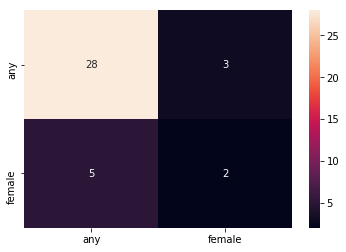

In [61]:
sns.heatmap(conf_matrix_df, annot=True).get_figure().savefig("gender.png")